Epoch 1/5
4510/4510 [==============================] - 235s 51ms/step - loss: 0.3133 - accuracy: 0.9097 - val_loss: 0.3024 - val_accuracy: 0.9134
Epoch 2/5
4510/4510 [==============================] - 231s 51ms/step - loss: 0.3027 - accuracy: 0.9127 - val_loss: 0.3023 - val_accuracy: 0.9134
Epoch 3/5
4510/4510 [==============================] - 232s 51ms/step - loss: 0.3015 - accuracy: 0.9131 - val_loss: 0.3005 - val_accuracy: 0.9134
Epoch 4/5
4510/4510 [==============================] - 233s 52ms/step - loss: 0.3005 - accuracy: 0.9131 - val_loss: 0.3014 - val_accuracy: 0.9134
Epoch 5/5
4510/4510 [==============================] - 227s 50ms/step - loss: 0.3000 - accuracy: 0.9132 - val_loss: 0.3012 - val_accuracy: 0.9135


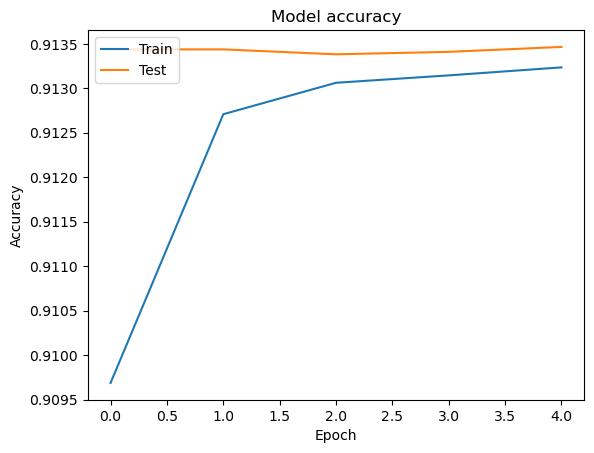

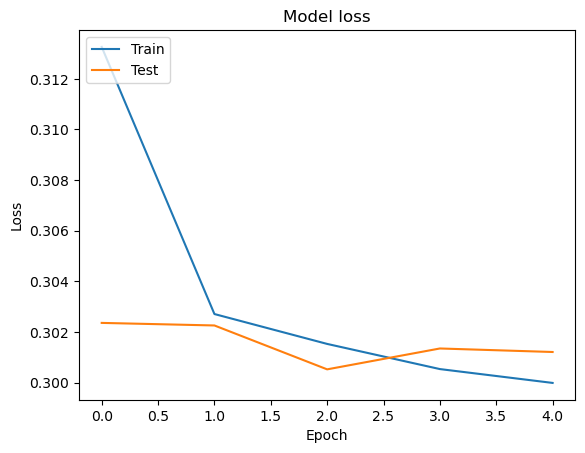

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and Explore the Dataset
df = pd.read_csv('Dataset-SA.csv')

# Step 2: Data Preprocessing
# Remove rows with missing values in 'Review' column
df = df.dropna(subset=['Review'])

# Step 3: Feature Engineering
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review'])
X = tokenizer.texts_to_sequences(df['Review'])
X = pad_sequences(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Step 4: Model Development
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]),
    LSTM(100),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Training and Evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

# Step 6: Documentation and Visualization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [4]:
# Load and preprocess new data for prediction
new_reviews = ["This product is fantastic!", 
               "I'm not satisfied with this purchase.", 
               "It's okay, not great though."]

# Tokenize and pad the new reviews
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=X.shape[1])

# Make predictions
predictions = model.predict(new_padded)

# Convert predictions back to sentiment labels
predicted_sentiments = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Print the predictions
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print()

1/1 [==============================] - 1s 1s/step
Review: This product is fantastic!
Predicted Sentiment: positive

Review: I'm not satisfied with this purchase.
Predicted Sentiment: positive

Review: It's okay, not great though.
Predicted Sentiment: positive



In [5]:
# Load and preprocess new data for prediction
new_reviews = ["This product is fantastic!", 
               "I'm not satisfied with this purchase.", 
               "It's okay, not great though.",
               "This is an average product.",
               "I have mixed feelings about it."]

# Tokenize and pad the new reviews
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=X.shape[1])

# Make predictions
predictions = model.predict(new_padded)

# Convert predictions back to sentiment labels
predicted_labels = np.argmax(predictions, axis=1)

# Define labels for sentiment
sentiment_labels = ['Negative', 'Neutral', 'Positive']

# Print the predictions
for review, label_index in zip(new_reviews, predicted_labels):
    sentiment = sentiment_labels[label_index]
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print()

1/1 [==============================] - 0s 16ms/step
Review: This product is fantastic!
Predicted Sentiment: Positive

Review: I'm not satisfied with this purchase.
Predicted Sentiment: Positive

Review: It's okay, not great though.
Predicted Sentiment: Positive

Review: This is an average product.
Predicted Sentiment: Negative

Review: I have mixed feelings about it.
Predicted Sentiment: Positive



Epoch 1/5
4510/4510 [==============================] - 315s 69ms/step - loss: 0.3137 - accuracy: 0.9093 - val_loss: 0.3028 - val_accuracy: 0.9134
Epoch 2/5
4510/4510 [==============================] - 159s 35ms/step - loss: 0.3026 - accuracy: 0.9129 - val_loss: 0.3030 - val_accuracy: 0.9135
Epoch 3/5
4510/4510 [==============================] - 406s 90ms/step - loss: 0.3013 - accuracy: 0.9131 - val_loss: 0.3008 - val_accuracy: 0.9134
Epoch 4/5
4510/4510 [==============================] - 151s 33ms/step - loss: 0.3005 - accuracy: 0.9132 - val_loss: 0.3032 - val_accuracy: 0.9133
Epoch 5/5
4510/4510 [==============================] - 262s 58ms/step - loss: 0.2999 - accuracy: 0.9132 - val_loss: 0.3003 - val_accuracy: 0.9134


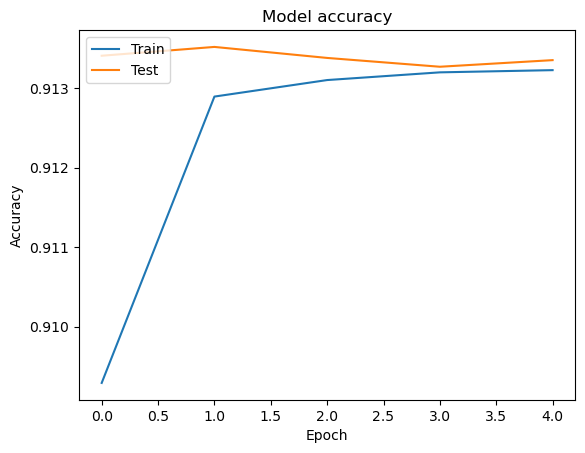

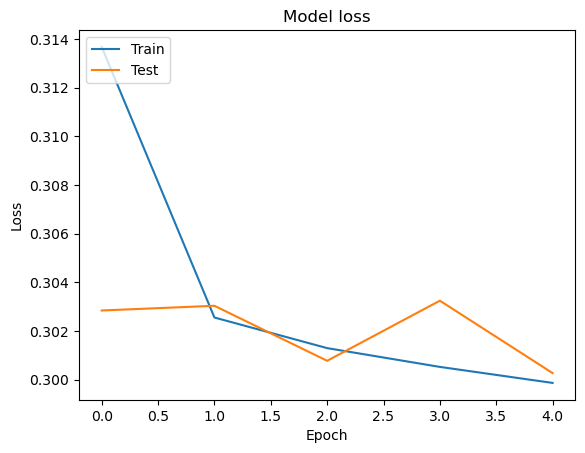

1/1 [==============================] - 1s 1s/step
Review: This product is fantastic!
Predicted Sentiment: Positive

Review: I'm not satisfied with this purchase.
Predicted Sentiment: Positive

Review: It's okay, not great though.
Predicted Sentiment: Positive

Review: This is an average product.
Predicted Sentiment: Negative

Review: I have mixed feelings about it.
Predicted Sentiment: Positive



In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and Explore the Dataset
df = pd.read_csv('Dataset-SA.csv')

# Step 2: Data Preprocessing
# Remove rows with missing values in 'Review' column
df = df.dropna(subset=['Review'])

# Step 3: Feature Engineering
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review'])
X = tokenizer.texts_to_sequences(df['Review'])
X = pad_sequences(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Step 4: Model Development (including Neutral category)
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]),
    LSTM(100),
    Dense(3, activation='softmax')  # Changed to 3 for Negative, Neutral, Positive
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Training and Evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

# Step 6: Documentation and Visualization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Load and preprocess new data for prediction
new_reviews = ["This product is fantastic!", 
               "I'm not satisfied with this purchase.", 
               "It's okay, not great though.",
               "This is an average product.",
               "I have mixed feelings about it."]

# Tokenize and pad the new reviews
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=X.shape[1])

# Make predictions
predictions = model.predict(new_padded)

# Convert predictions back to sentiment labels
predicted_labels = np.argmax(predictions, axis=1)

# Define labels for sentiment (including Neutral)
sentiment_labels = ['Negative', 'Neutral', 'Positive']

# Print the predictions
for review, label_index in zip(new_reviews, predicted_labels):
    sentiment = sentiment_labels[label_index]
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print()